In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import string
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [17]:
df = pd.read_csv("Twitter Jan Mar.csv")
df = df.reindex(index=df.index[::-1])
df = df.dropna()
df = df.drop(['id'], axis=1)
df.head()

,date,content,username,like_count,retweet_count
500035,2023-01-04 07:16:56+00:00,I used chat gpt to get gym workout program and...,pnik91,0.0,0.0
500034,2023-01-04 07:17:08+00:00,I'm quite amazed by Chat GPT. A really promisi...,manumurali369,1.0,0.0
500033,2023-01-04 07:17:20+00:00,all my twitter feed is about ChatGPT and @Open...,mcp350,3.0,1.0
500032,2023-01-04 07:17:50+00:00,#ChatGPT \n\nSo much #Censorship.\n\nNever tru...,TryingToOffend,2.0,0.0
500031,2023-01-04 07:18:08+00:00,@GoogleAI #LAMDA Versus @OpenAI #ChatGPT ?! Wh...,Pup_In_Cup,1.0,0.0


In [3]:
date_map = { idx: date for idx, date in zip(df.index, list(map(lambda x: x.split()[0], df['date']))) }

In [4]:
def convert_date(x):
    x = x.split()[0].split('-')[1:]
    return (int(x[0]) - 1) * 30 + int(x[1])

df['date'] = list(map(convert_date, df['date']))

In [5]:
df = df.drop(['username', 'like_count', 'retweet_count'], axis=1)
df.head()

,date,content
500035,4,I used chat gpt to get gym workout program and...
500034,4,I'm quite amazed by Chat GPT. A really promisi...
500033,4,all my twitter feed is about ChatGPT and @Open...
500032,4,#ChatGPT \n\nSo much #Censorship.\n\nNever tru...
500031,4,@GoogleAI #LAMDA Versus @OpenAI #ChatGPT ?! Wh...


In [6]:
n = 0
df[n:n+50]

,date,content
500035,4,I used chat gpt to get gym workout program and...
500034,4,I'm quite amazed by Chat GPT. A really promisi...
500033,4,all my twitter feed is about ChatGPT and @Open...
500032,4,#ChatGPT \n\nSo much #Censorship.\n\nNever tru...
500031,4,@GoogleAI #LAMDA Versus @OpenAI #ChatGPT ?! Wh...
500030,4,It’s not what you say\n(or write)\n\nIt’s how ...
500029,4,@LoftedLearning Great thread thanks Logan. I’v...
500028,4,"Microsoft, OpenAI Aim for ChatGPT AI-Backed Bi..."
500027,4,ChatGPT is a large language model chatbot deve...
500026,4,Chat GPT supports Swahili https://t.co/tyaRF9uRcQ


In [7]:
def process_text(x):
    x = x.lower().encode("ascii", "ignore").decode()
    remove = ['\n'] + list(string.punctuation)
    for c in remove:
        x = x.replace(c, '')

    return x.split()


df['content'] = list(map(process_text, df['content']))
df.head()

,date,content
500035,4,"[i, used, chat, gpt, to, get, gym, workout, pr..."
500034,4,"[im, quite, amazed, by, chat, gpt, a, really, ..."
500033,4,"[all, my, twitter, feed, is, about, chatgpt, a..."
500032,4,"[chatgpt, so, much, censorshipnever, trust, a,..."
500031,4,"[googleai, lamda, versus, openai, chatgpt, who..."


In [8]:
def count_words(time_period):
    l = list(itertools.chain.from_iterable(list(time_period['content'])))
    word_counts = Counter(l)
    word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    return word_counts

count_words(df)

[('chatgpt', 408060),
 ('the', 351934),
 ('to', 306062),
 ('and', 219542),
 ('a', 212462),
 ('is', 180320),
 ('ai', 180186),
 ('of', 180037),
 ('gpt', 140508),
 ('chat', 138662),
 ('it', 134391),
 ('in', 131658),
 ('for', 127613),
 ('i', 110239),
 ('you', 94806),
 ('with', 94574),
 ('on', 85253),
 ('that', 75415),
 ('this', 72818),
 ('be', 58628),
 ('openai', 57780),
 ('can', 56557),
 ('its', 55738),
 ('are', 53352),
 ('will', 51159),
 ('how', 49676),
 ('about', 48741),
 ('your', 45631),
 ('what', 44600),
 ('by', 43618),
 ('as', 42647),
 ('my', 39129),
 ('have', 38853),
 ('but', 38842),
 ('not', 38594),
 ('more', 37374),
 ('an', 36433),
 ('from', 36326),
 ('we', 36006),
 ('like', 35285),
 ('just', 33892),
 ('use', 33587),
 ('has', 32010),
 ('at', 31036),
 ('gpt4', 30682),
 ('or', 30399),
 ('me', 30224),
 ('new', 29315),
 ('if', 28294),
 ('do', 28031),
 ('google', 27812),
 ('so', 27447),
 ('out', 27431),
 ('using', 27001),
 ('was', 25866),
 ('now', 25372),
 ('all', 25047),
 ('amp', 2436

In [9]:
def get_periods(df, num_samples):
    num_samples = int(num_samples)
    time_periods = [
        (0, num_samples),
        (len(df) - num_samples, len(df))
    ]
    return df[time_periods[0][0]:time_periods[0][1]], df[time_periods[1][0]:time_periods[1][1]], 

In [10]:
periods = get_periods(df, 1e+5)
counts = count_words(periods[0]), count_words(periods[1])

In [11]:
def get_count_diffs(counts1, counts2):
    dict1 = { key: val for key, val in counts1}
    dict2 = { key: val for key, val in counts2}
    diffs = {}
    for key in dict1.keys():
        try:
            diffs[key] = dict2[key] - dict1[key]
        except:
            pass
    return diffs

count_diffs = get_count_diffs(counts[0], counts[1])
count_diffs = sorted(count_diffs.items(), key=lambda x: x[1])

In [12]:
def get_count_diffs_df(min_change, remove_words):
    df = pd.DataFrame({'word': list(map(lambda x: x[0], count_diffs)),
                       'count': list(map(lambda x: x[1], count_diffs))})
    df = pd.concat([df[df['count'] < -min_change], df[df['count'] > min_change]])
    df = df[~df['word'].isin(remove_words)]
    return df

remove_words = "what search of about to be in will is it a and the more your than with how using use 10 4 gpt chat so our now you 500 times"
remove_words = remove_words.split()
df = get_count_diffs_df(min_change=700, remove_words=remove_words)

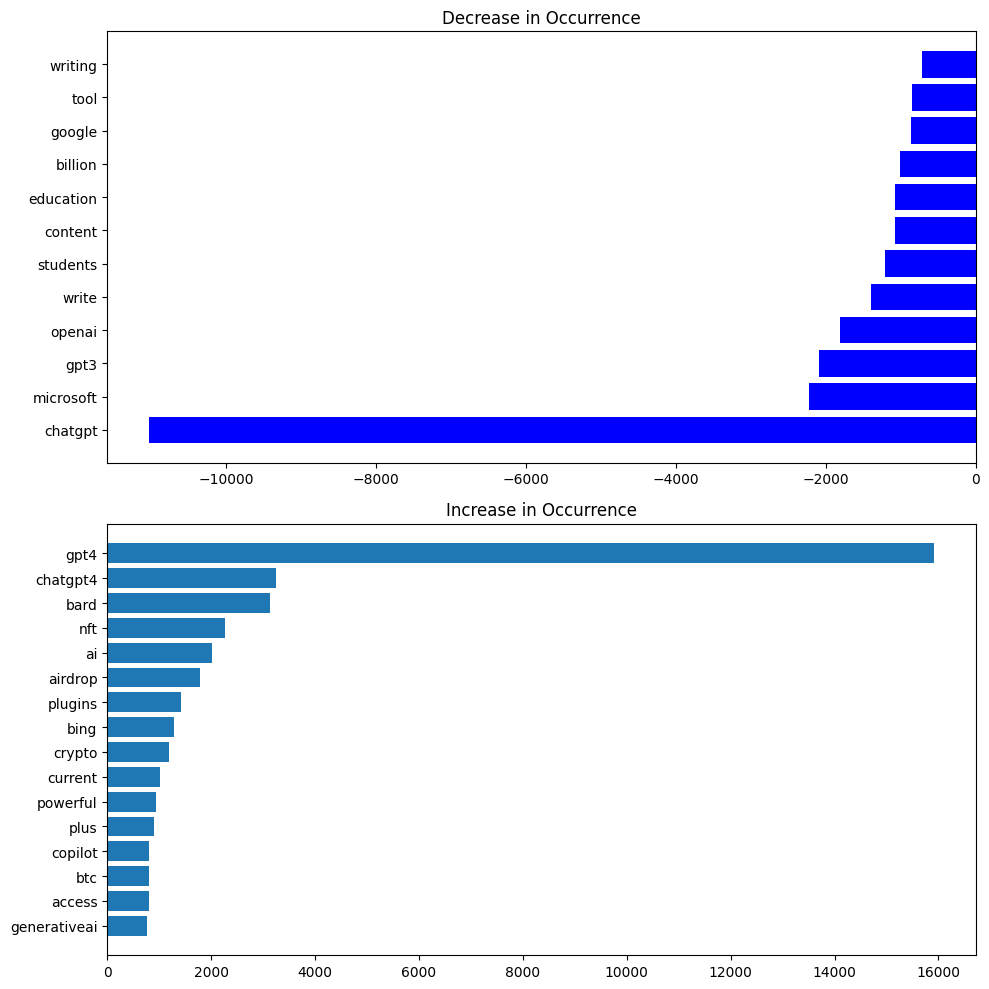

In [13]:
negative_df = df[df['count'] < 0]
positive_df = df[df['count'] > 0]

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plotting the first bar graph in the first subplot
axs[0].barh(negative_df['word'], negative_df['count'], color='blue')
axs[0].set_title('Decrease in Occurrence')

# Plotting the second bar graph in the second subplot
axs[1].barh( positive_df['word'], positive_df['count'])
axs[1].set_title('Increase in Occurrence')
plt.tight_layout()
# Displaying the subplots
plt.show()
